### Full Name : Ariana Koocheki Dariuni
### Student Number : 400103624
___

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons
from sklearn.decomposition import PCA

In [2]:
!wget -O /kaggle/working/apple_quality.csv "https://www.dropbox.com/scl/fi/gt1w6kf2ti7g5k0tn5pdu/apple_quality.csv?rlkey=vcp2hmm7p25rgus6bu5gab0jt&dl=1"

--2024-04-07 20:53:33--  https://www.dropbox.com/scl/fi/gt1w6kf2ti7g5k0tn5pdu/apple_quality.csv?rlkey=vcp2hmm7p25rgus6bu5gab0jt&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucee152749760cda123a806f7663.dl.dropboxusercontent.com/cd/0/inline/CQndrkmR310chFqJYD1gqcI9auNZOgS7vyXAtR3ibaVJfpOhSsEG3s3N1xX9NKmjV-0tn3mhUsgmTovLZ9NBXnKU5wtdS1d42WZzYw12ZzkiWHLzTn1ijsXuae5N-Uiz6bmP29CyagfiZSDfcXIEMsqg/file?dl=1# [following]
--2024-04-07 20:53:34--  https://ucee152749760cda123a806f7663.dl.dropboxusercontent.com/cd/0/inline/CQndrkmR310chFqJYD1gqcI9auNZOgS7vyXAtR3ibaVJfpOhSsEG3s3N1xX9NKmjV-0tn3mhUsgmTovLZ9NBXnKU5wtdS1d42WZzYw12ZzkiWHLzTn1ijsXuae5N-Uiz6bmP29CyagfiZSDfcXIEMsqg/file?dl=1
Resolving ucee152749760cda123a806f7663.dl.dropboxusercontent.com (ucee152749760cda123a806f7663.dl.dropboxusercontent.com)... 

# Sec 1: Exploration (15 points)

Load the dataset as a dataframe. **(Sec1-P1: 1 point)**

In [3]:
file_path = '/kaggle/working/apple_quality.csv'
df = pd.read_csv(file_path)
df.tail()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


Display mean, standard deviation, min and max of each feature. **(Sec1-P2: 2 point)**

In [4]:
df.describe(include = 'all')

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4001,4000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4001,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.491590483,good
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2004
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,NaN,NaN
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,NaN,NaN
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,NaN,NaN
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,NaN,NaN
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,NaN,NaN
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,NaN,NaN


Remove Last Row, ID and Acidity. **(Sec1-P3: 2 point)**

In [5]:
df.drop(index=df.index[-1],axis=0,inplace=True)
df=df.drop(columns=['A_id', 'Acidity'])


Plot the distribution of each feature and identify the median value for both good and bad quality separately. **(Sec1-P4: 6 point)**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

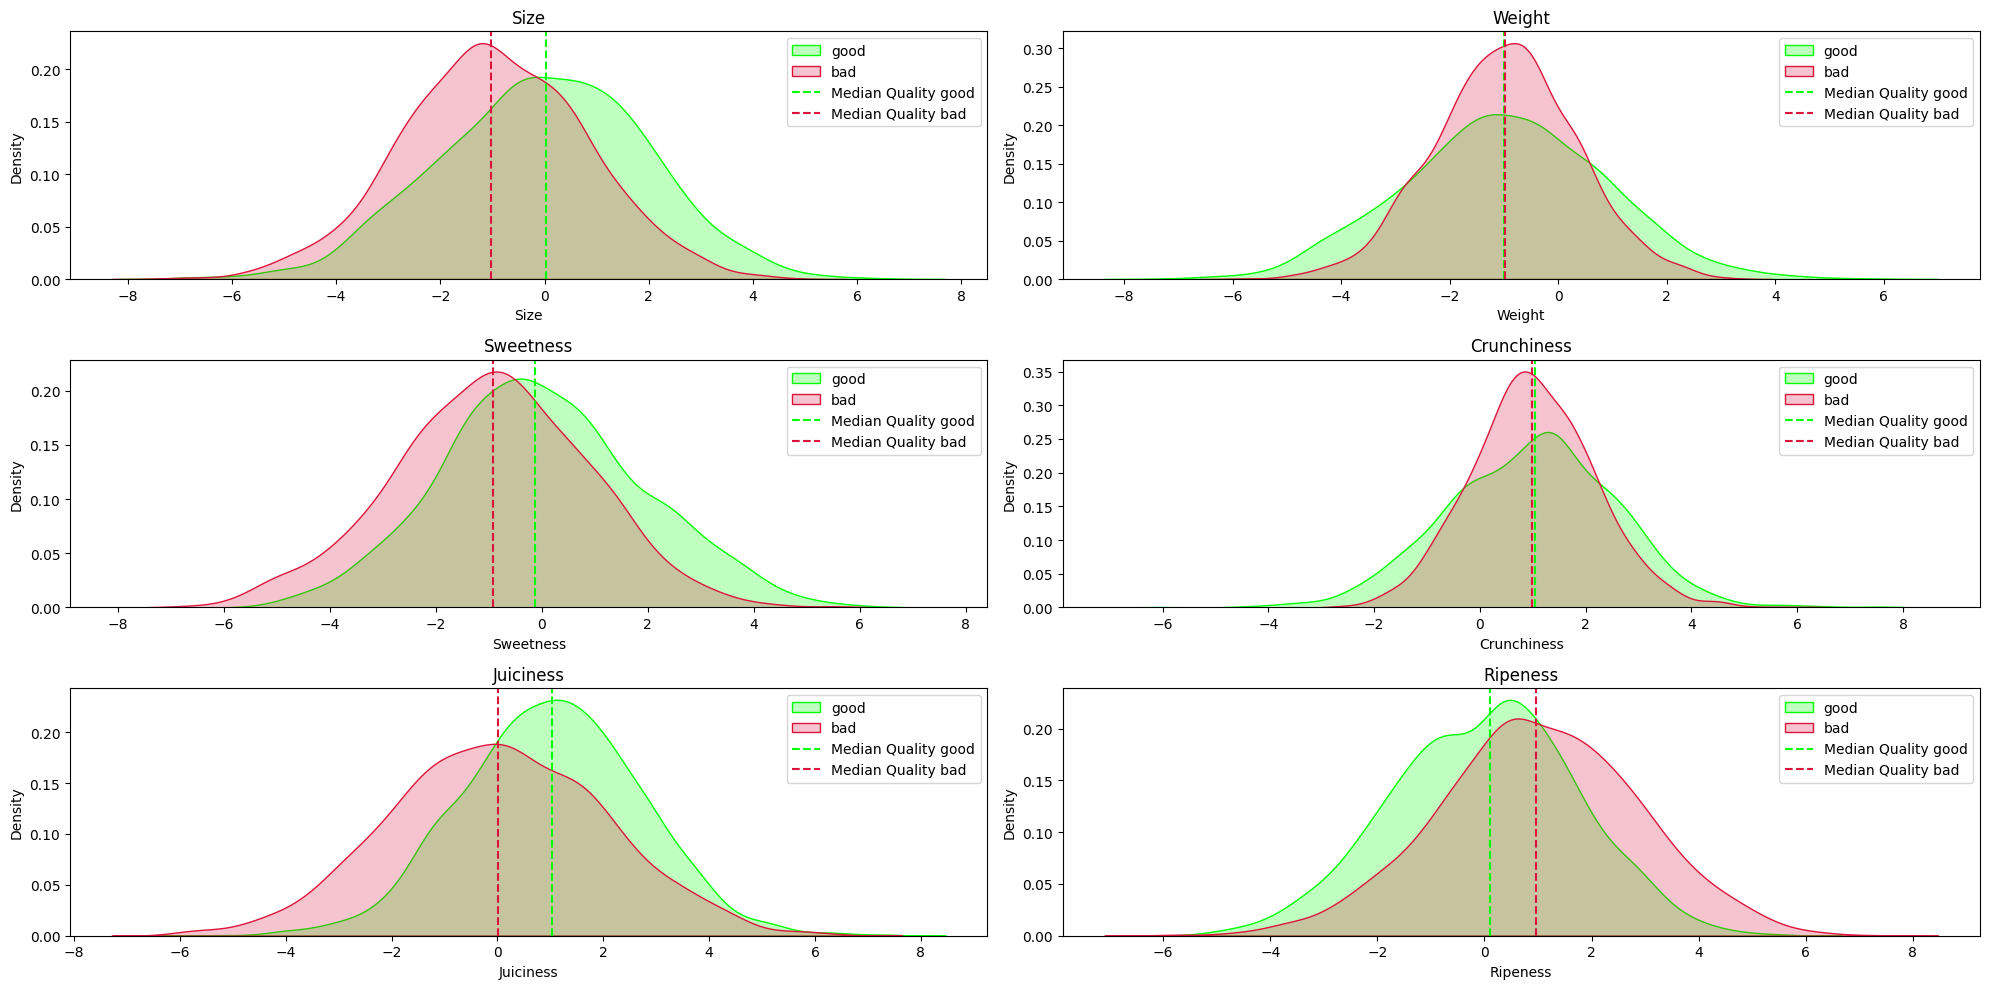

In [6]:
# Separate the DataFrame by quality
good_quality = df[df['Quality'] == 'good']
bad_quality = df[df['Quality'] == 'bad']

# Plot the distribution of each feature for both good and bad quality
fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(20, 10))
features =['Size','Weight','Sweetness','Crunchiness','Juiciness','Ripeness']


for i,feature in enumerate(features):
    row = i//2
    col = i%2
    ax = axes[row,col]
    sns.kdeplot(data=good_quality[feature], ax=ax, color='lime', fill=True, label='good')
    sns.kdeplot(data=bad_quality[feature], ax=ax, color='crimson', fill=True, label='bad')  
    ax.axvline(x=good_quality[feature].median(), linestyle='--', color='lime', label='Median Quality good')    
    ax.axvline(x=bad_quality[feature].median(), linestyle='--', color='crimson', label='Median Quality bad')
    ax.set_title(feature)
    ax.legend()
    
    
plt.tight_layout()
plt.show()

Plot the correlation matrix. **(Sec1-P5: 4 point)**

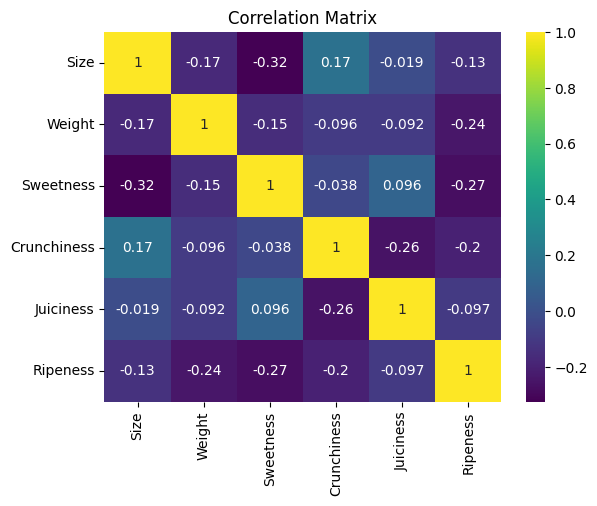

In [7]:
mat=df.drop(['Quality'], axis=1).corr()
sns.heatmap(mat,annot=True, cmap="viridis").set_title('Correlation Matrix')
plt.show()

# Sec 2: Preprocessing (10 points)

Convert Quality column to a new binary column (having only 0 and 1 values). Then remove the original column. **(Sec2-P1: 3 point)** 

In [8]:
df['Quality'] = df['Quality'].map({'good': 1, 'bad': 0})
    

Compute the number of outliners for each feature and remove them. **(Sec2-P2: 7 point)**  

In [9]:
def removing_outliers(df):
    df_out = pd.DataFrame()
    for col in df.columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
         #calculating lower and upper
        lower_bound = q1 - 1.5 * (q3 - q1)
        upper_bound = q3 + 1.5 * (q3 - q1)
        #calculating out
        df_out[col] = df[col][(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df_out.dropna()


def calculating_outliers(df):
    acc = []
    for col in df.columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
         #calculating lower and upper
        lower_bound = q1 - 1.5 * (q3 - q1)
        upper_bound = q3 + 1.5 * (q3 - q1)
        out = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
        acc.append([col, q3-q1, lower_bound, upper_bound, out])
    return pd.DataFrame(acc, columns=['col', 'q3-q1', 'lower_bound', 'upper_bound', 'out'])
dfcopy=df.copy()
df=removing_outliers(df)
calculating_outliers(dfcopy)



,col,q3-q1,lower_bound,upper_bound,out
0,Size,2.622291,-5.750201,4.738963,22
1,Weight,2.042747,-5.075890,3.095097,54
2,Sweetness,2.540347,-5.548946,4.612442,32
3,Crunchiness,1.831470,-2.684440,4.641439,47
4,Juiciness,2.637262,-4.757179,5.791870,32
5,Ripeness,2.537889,-4.578510,5.573044,24
6,Quality,1.000000,-1.500000,2.500000,0


# Sec 3: Training Models (41 points)

Convert the dataset (`x` and `y`) into numpy arrays, and split them into "training" and "testing" parts containing 80% and 20% of the data respectively. **(Sec3-P1: 5 point)** 

In [10]:
features=df.drop('Quality',axis=1)
x = features.to_numpy()
y = df.Quality.to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x , y , test_size = 0.2 , random_state=42 ) # FILL HERE

Train both LDA and QDA models on the data using `sklearn`. **(Sec3-P2: 3 point)** 

In [11]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)


LinearDiscriminantAnalysis()

In [12]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train, y_train)


QuadraticDiscriminantAnalysis()

Implement LDA and QDA.

Linear Discriminant Analysis **(Sec3-P3: 15 point)**

In [13]:
class LDA:
    """
    Fits it on data, then uses predict to get results.
    """

    def __init__(self):
        self.Cov = None
        self.M0 = None
        self.M1 = None
        self.P0 = None
        self.P1 = None
    
    def fit(self, X, y):
        """Fit the training data
        Parameters
        ----------
        X : array-like, shape = [n_samples, n_features]
            Features
        y : array-like, shape = [n_samples, n_labels]
            Labels
        Returns
        -------
        self : object
        """
        
        n_samples, n_features = X.shape
        self.P1 = y.sum()/n_samples
        self.P0 = 1-self.P1
        self.M0 = np.mean(X[y==0], axis=0)
        self.M1 = np.mean(X[y==1], axis=0)
        self.Cov= ((X[y==0] - self.M0).T @ (X[y==0] - self.M0) + (X[y==1] - self.M1).T @ (X[y==1] - self.M1)) / (n_samples - 2)

        # TODO
    
    def predict(self, X):
        """ Predicts the value after the model has been trained.
        Parameters
        ----------
        X : array-like, shape = [n_samples, n_features]
            Features
        Returns
        -------
        Predicted value
        """
        n_samples, n_features = X.shape

        # TODO
        cov_inverse= np.linalg.inv(self.Cov)
        return(X @ cov_inverse @ self.M1 - 0.5 * self.M1.T @ cov_inverse @ self.M1 + np.log(self.P1)> X @ cov_inverse @ self.M0 - 0.5 * self.M0.T @ cov_inverse @ self.M0 + np.log(self.P0)).astype(int)
         
        

Quadratic Discriminant Analysis **(Sec3-P4: 15 point)** 

In [14]:
class QDA:
    """
    Fits it on data, then uses predict to get results.
    """

    def __init__(self):
        self.Cov0 = None
        self.Cov1 = None
        self.M0 = None
        self.M1 = None
        self.P0 = None
        self.P1 = None
    
    def fit(self, X, y):
        """Fit the training data
        Parameters
        ----------
        X : array-like, shape = [n_samples, n_features]
            Features
        y : array-like, shape = [n_samples, n_labels]
            Labels
        Returns
        -------
        self : object
        """

        n_samples, n_features = X.shape

        # TODO
        self.P1 = y.sum()/n_samples
        self.P0 = 1-self.P1
        self.M0 = np.mean(X[y==0], axis=0)
        self.M1 = np.mean(X[y==1], axis=0)
        self.Cov0 = ((X[y==0] - self.M0).T @ (X[y==0] - self.M0)) / (X[y==0].shape[0] - 1)
        self.Cov1 = ((X[y==1] - self.M1).T @ (X[y==1] - self.M1)) / (X[y==1].shape[0] - 1)
    
    def predict(self, X):
        """ Predicts the value after the model has been trained.
        Parameters
        ----------
        X : array-like, shape = [n_samples, n_features]
            Features
        Returns
        -------
        Predicted value
        """
        n_samples, n_features = X.shape
        
        Cov1_inv = np.linalg.inv(self.Cov1)
        Cov1_det = np.linalg.det(self.Cov1)
        Cov0_inv = np.linalg.inv(self.Cov0)
        Cov0_det = np.linalg.det(self.Cov0)

        delta1 = -0.5 * np.log(Cov1_det) - 0.5 * np.diagonal((X - self.M1) @ Cov1_inv @ (X - self.M1).T) + np.log(self.P1)
        delta0 = -0.5 * np.log(Cov0_det) - 0.5 * np.diagonal((X - self.M0) @ Cov0_inv @ (X - self.M0).T) + np.log(self.P0)
        return (delta1 > delta0).astype(int) 

Train your models! **(Sec3-P5: 3 point)** 

In [15]:
my_lda = LDA()
my_lda.fit(x_train, y_train)

In [16]:
my_qda = QDA()
my_qda.fit(x_train, y_train)

# Sec 4: Evaluation (11 points)

Using all 4 models, predict the labels for all samples belonging to the "testing" part. **(Sec4-P1: 3 point)** 

In [17]:
y_pred_sklda = lda.predict(x_test)
y_pred_skqda = qda.predict(x_test)
y_pred_lda = my_lda.predict(x_test)
y_pred_qda = my_qda.predict(x_test)

Calculate Accuracy, Precision, Recall, and F1-Score for your own models. **(Sec4-P2: 5 point)** 

In [18]:
print('LDA:')
print(classification_report(y_test, y_pred_lda))

LDA:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       407
           1       0.70      0.74      0.72       355

    accuracy                           0.73       762
   macro avg       0.73      0.73      0.73       762
weighted avg       0.73      0.73      0.73       762



In [19]:
print('QDA:')
print(classification_report(y_test, y_pred_qda))

QDA:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       407
           1       0.79      0.81      0.80       355

    accuracy                           0.81       762
   macro avg       0.81      0.81      0.81       762
weighted avg       0.81      0.81      0.81       762



Compute the ROC AUC Score using `sklearn`. (for both LDA and QDA models trained using this library.) **(Sec4-P3: 3 point)** 

In [20]:
print('LDA:')
roc_auc_score(y_test, y_pred_sklda)

LDA:


0.7330103470948541

In [21]:
print("QDA:")
roc_auc_score(y_test, y_pred_skqda)

QDA:


0.8134962106793092

# Sec 5: Plotting Decision Boundaries Using Your Own Models (53 points)

Display data in 2 dimencions using PCA **(Sec5-P1: 10 point)** 


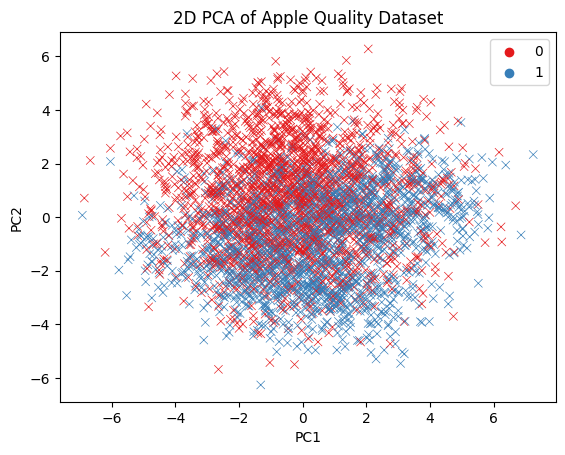

In [22]:
Sk_PCA = PCA(n_components=2)
Sk_PCA.fit(df)
the_mat = Sk_PCA.transform(df)

p = sns.scatterplot(x=the_mat[:,0], y=the_mat[:,1], hue=y,marker="x", palette="Set1")
p.set(xlabel="PC1", ylabel="PC2")
p.set_title('2D PCA of Apple Quality Dataset')
p.legend()
plt.show()

Implement plot_decision_boundaries. **(Sec5-P2: 10 point)** 

In [23]:
def plot_decision_boundaries(X, y, classifier):
    """
    Plots decision boundaries for a classifier on 2D data.
    
    Parameters
    ----------
    X : array-like, shape = [n_samples, n_features]
        2D data after PCA transformation
    y : array-like, shape = [n_samples, ]
        Labels for the data
    classifier : Classifier instance
        An instance of a classifier with a fit method
    """
    
    # TODO
    
    min_1, max_1 = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    min_2, max_2 = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx,yy= np.meshgrid(np.arange(min_1, max_1, 0.08), np.arange(min_2, max_2, 0.08))
    zz = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    zz = zz.reshape(xx.shape)
    plt.contourf(xx, yy, zz, alpha=0.4, cmap='Set1')
    p = sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette='Set1',marker="x")
    p.set_title("Decision Boundary")

Split the PCA transformed dataset (`x` and `y`) into "training" and "testing" parts containing 80% and 20% of the data respectively.  **(Sec5-P3: 2 point)**  

In [24]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(the_mat, y, test_size=0.2, random_state=42)

# LDA:

Initialize your LDA classifier and fit it on the PCA-transformed data  **(Sec5-P4: 2 point)** 


In [25]:
mylda_pca = LDA()
mylda_pca.fit(x_train_pca, y_train_pca)

Now plot the decision boundaries of the LDA **(Sec5-P5: 2 point)**  

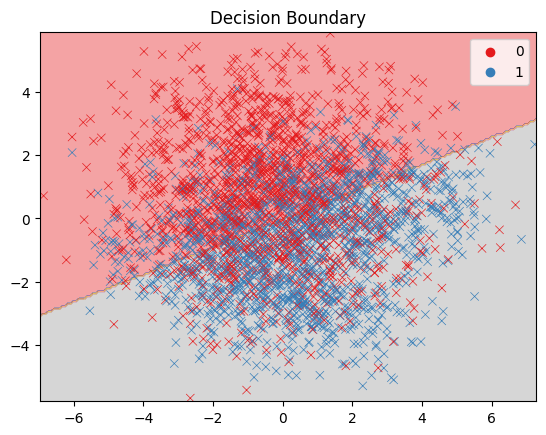

In [26]:
plot_decision_boundaries(x_train_pca, y_train_pca, mylda_pca)

# QDA:

Initialize your QDA classifier and fit it on the PCA-transformed data **(Sec5-P6: 2 point)** 


In [27]:
myqda_p = QDA()
myqda_p.fit(x_train_pca, y_train_pca)

Now plot the decision boundaries of the QDA **(Sec5-P7: 2 point)** 

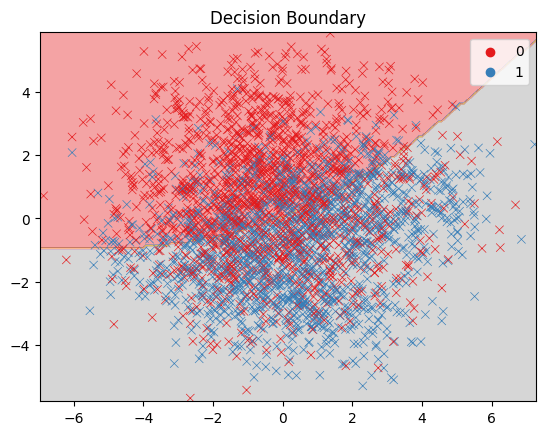

In [28]:
plot_decision_boundaries(x_train_pca, y_train_pca, myqda_p)

### Theoretical Insights (23 points)

Derive the mathematical formulation for the decision boundaries of LDA and QDA. Discuss how the eigenvectors and eigenvalues of the covariance matrices influence the shape and orientation of these boundaries. **(Sec5-P8: 11.5 point)** 


The discriminant functions for each class $k$ are defined as follows:

LDA:
$\delta_k(x) = x^T\Sigma^{-1}\mu_k - \frac{1}{2}\mu_k^T \Sigma^{-1}\mu_k + \log \pi_k$

QDA:
$\delta_k(x) = -\frac{1}{2} \log |\Sigma_k| - \frac{1}{2}(x - \mu_k)^T \Sigma_k^{-1}(x - \mu_k) + \log \pi_k$

For two classes, the decision boundary is where $\delta_0(x) = \delta_1(x)$:

LDA:
$x^T\Sigma^{-1}\mu_0 - \frac{1}{2}\mu_0^T \Sigma^{-1}\mu_0 + \log \pi_0 = x^T\Sigma^{-1}\mu_1 - \frac{1}{2}\mu_1^T \Sigma^{-1}\mu_1 + \log \pi_1$

QDA:
$-\frac{1}{2} \log |\Sigma_0| - \frac{1}{2}(x - \mu_0)^T \Sigma_0^{-1}(x - \mu_0) + \log \pi_0 = -\frac{1}{2} \log |\Sigma_1| - \frac{1}{2}(x - \mu_1)^T \Sigma_1^{-1}(x - \mu_1) + \log \pi_1$

We apply an eigen-decomposition to each $\Sigma_k$, i.e., $\Sigma_k = U_k D_k U_k^T$, where $U_k$ is orthonormal and $D_k$ is diagonal with positive eigenvalues $d_{kl}$.

So the discriminant function can be simplified to:

$\delta_{k} (x) =  - \frac{1}{2} \left \Vert D^{- \frac{1}{2}} U^{T} (x - \hat{\mu}_{k}) \right \Vert^{2}_{2} + \log \hat{\pi}_{k}$

This shows that the decision boundary will be of the form of difference between two norms equal a fixed number. So this transformation (constructed by eigenvalues and eigenvectors) will determine the shape and orientation of the decision boundary in the feature space.






Given the PCA transformation of the data, how does the change in basis affect the computational complexity and the discriminative power of LDA and QDA? Provide a theoretical justification for your answer. **(Sec5-P9: 11.5 point)** 

# Investigating Dimensions and Effects of PCA in LDA-QDA Algorithm

## Dimensionality Reduction with PCA:

PCA optimizes computations by reducing feature space dimensions, enhancing execution speed by minimizing parameters and approximation. Simultaneously, it aims to preserve existing variance to retain crucial information during dimensionality reduction.

### Considerations Regarding Dimensionality Reduction:

- Information loss occurs with dimensionality reduction.
- The discriminative power of the LDA-QDA algorithm diminishes to some extent with dimensionality reduction.

### Balancing Bias and Variance:

- Increasing PCA dimensions increases variance and reduces bias, preventing overfitting.
- However, increased variance comes at the cost of information loss and increased bias.

### Selecting an Appropriate Number of Dimensions:

#### Solutions:
- Employ various criteria like AIC and BIC to select the number of dimensions.
- Analyze the scree plot to observe the variance of each dimension.
- Use cross-validation methods to evaluate algorithm performance with different dimensionality settings.

#### Considerations for Dimension Selection:
- Too few dimensions lead to significant information loss.
- Too many dimensions result in overfitting.

#### Dimension Selection Tips:
- The number of dimensions chosen depends on the data nature and the algorithm used.

## Summary:

PCA serves as a powerful tool for dimensionality reduction, enhancing the speed of the LDA-QDA algorithm. However, careful attention is needed when selecting the number of dimensions to prevent information loss and reduce the degradation of algorithm discriminative power.

Given the PCA transformation of the data, how does the change in basis affect the computational complexity and the discriminative power of LDA and QDA? Provide a theoretical justification for your answer. **(Sec5-P9: 11.5 point)** 

# Investigating Dimensions and Effects of PCA in LDA-QDA Algorithm

## Dimensionality Reduction with PCA:

PCA optimizes computations by reducing feature space dimensions, enhancing execution speed by minimizing parameters and approximation. Simultaneously, it aims to preserve existing variance to retain crucial information during dimensionality reduction.

### Considerations Regarding Dimensionality Reduction:

- Information loss occurs with dimensionality reduction.
- The discriminative power of the LDA-QDA algorithm diminishes to some extent with dimensionality reduction.

### Balancing Bias and Variance:

- Increasing PCA dimensions increases variance and reduces bias, preventing overfitting.
- However, increased variance comes at the cost of information loss and increased bias.

### Selecting an Appropriate Number of Dimensions:

#### Solutions:
- Employ various criteria like AIC and BIC to select the number of dimensions.
- Analyze the scree plot to observe the variance of each dimension.
- Use cross-validation methods to evaluate algorithm performance with different dimensionality settings.

#### Considerations for Dimension Selection:
- Too few dimensions lead to significant information loss.
- Too many dimensions result in overfitting.

#### Dimension Selection Tips:
- The number of dimensions chosen depends on the data nature and the algorithm used.

## Summary:

PCA serves as a powerful tool for dimensionality reduction, enhancing the speed of the LDA-QDA algorithm. However, careful attention is needed when selecting the number of dimensions to prevent information loss and reduce the degradation of algorithm discriminative power.



# Sec 6: KNN (45 points)

Implement KNN.  **(Sec6-P1: 20 point)** 

In [29]:
def knn(training_x, training_y, testing_x, k):
    """
    K-Nearest Neighbors
    
    Parameters
    ----------
    training_x : array-like, shape = [n_samples, n_features]
        Training data
    training_y : array-like, shape = [n_samples, ]
        Training labels
    testing_x : array-like, shape = [n_samples, n_features]
        Testing data
    k : int
        Number of neighbors to use
    """
    
    prediction = []
    for test in testing_x:
        distances = np.sqrt(np.sum((training_x - test)**2, axis=1))
        nearest_indices = np.argsort(distances)[:k]
        nearest_labels = training_y[nearest_indices]
        unique_labels, counts = np.unique(nearest_labels, return_counts=True)
        prediction.append(unique_labels[np.argmax(counts)])
    return np.array(prediction)    
     

Test your KNN model on the dataset and report the accuracy. **(Sec6-P2: 5 point)** 

In [30]:
# load 10000 samples from make_moons dataset and a desired noise level
# TODO
X, y = make_moons(n_samples=10000, noise=0.2)

# split the dataset into training and testing parts
# TODO
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Run Knn with k=3 on dataset and report its accuracy (you can use sklearn's accuracy_score)
# TODO

pred = knn(x_train, y_train, x_test, 3)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.9645


Implement plotting the decision boundary.**(Sec6-P3: 10 point)** 

In [32]:
def decision_boundary_plot(x_train, y_train, k):
    """
    Plots the decision boundary for KNN
    
    Parameters
    ----------
    x_train : array-like, shape = [n_samples, n_features]
        Training data
    y_train : array-like, shape = [n_samples, ]
        Training labels
    k : int
        Number of neighbors to use
    """
    
    # TODO
    min_1, max_1 = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
    min_2, max_2 = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2 
    xx,yy= np.meshgrid(np.arange(min_1, max_1, 0.1),np.arange(min_2, max_2, 0.1) )
    zz = knn(x_train, y_train,np.c_[xx.ravel(), yy.ravel()],k)
    zz = np.array(zz).reshape(xx.shape)
    plt.contourf(xx, yy, zz, alpha=0.4, cmap='Dark2')
    p = sns.scatterplot(x=x_train[:,0], y=x_train[:,1], hue=y_train, palette='Dark2')
    p.set_title(f"KNN (k={k}) Decision Boundary")
    plt.show()

Plot the decision boundary for KNN with k=[1, 3, 10, 50, 100] **(Sec6-P4: 5 point)** 

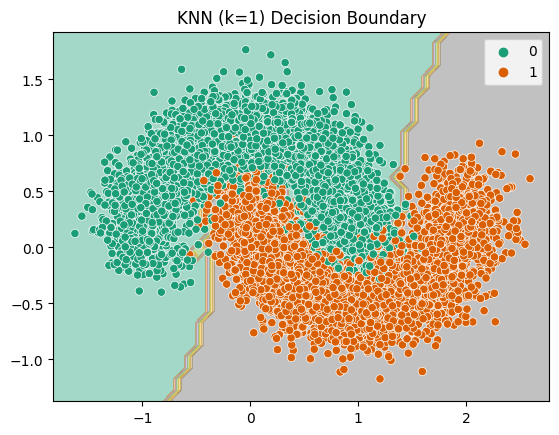

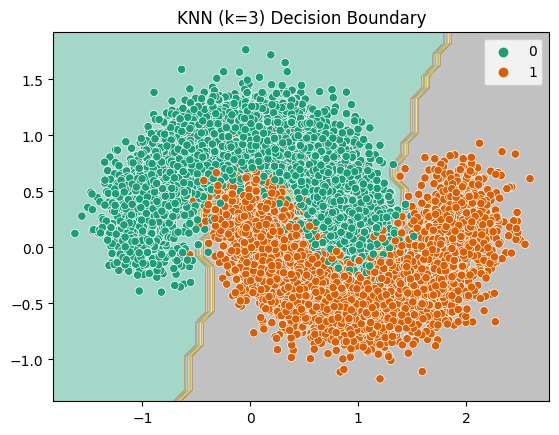

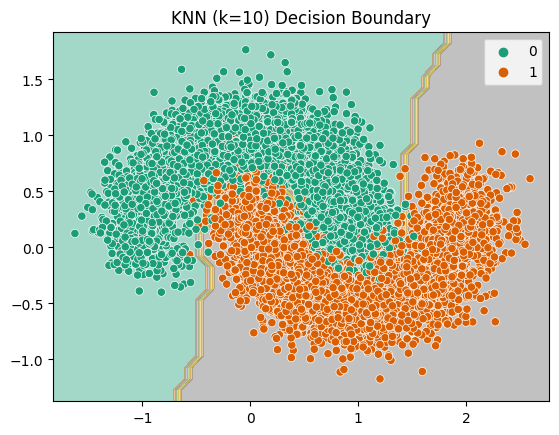

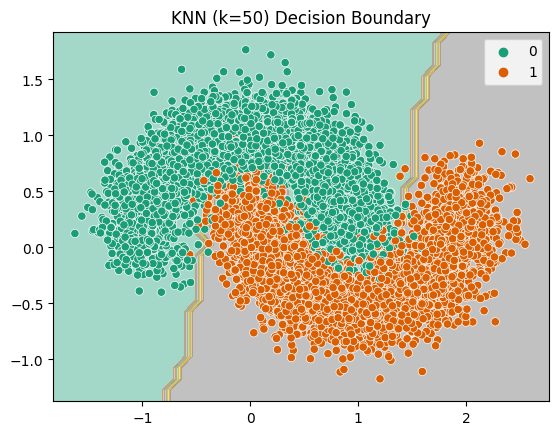

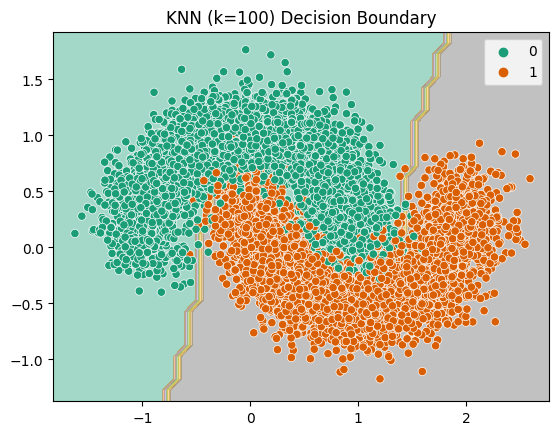

In [33]:
# TODO
KNN_list=[1, 3, 10, 50, 100]
for k in KNN_list:
    decision_boundary_plot(x_train, y_train, k)

### Interpret the results **(Sec6-P5: 5 point)** 

Why decision boundaries change in that way?


### Parameter Selection and Bias-Variance Tradeoff

 As we know, parameter selection significantly impacts the balance between bias and variance in statistical models. Smaller parameter values lead the model towards low bias and high variance. This increases model flexibility and makes it more similar to the training data. However, this can result in overfitting, where the model fails to generalize to new data and performs poorly in practice. In this case, decision boundaries become illogical and highly sensitive to changes in the training data.

 Conversely, larger parameter values reduce variance and increase bias. In this case, decision boundaries have less dependence on training data noise, and the model tends to oversimplify. This reduces model flexibility and may lead to missing existing patterns in the data.

 Therefore, selecting the appropriate parameter is a crucial challenge in statistical modeling. Incorrect parameter selection can lead to overfitting or excessive model simplification, severely reducing its effectiveness in practice.




